# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 or later syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npy files, and will contain data in a single numpy array corresponding to the unlabelled data X of shape num_samples by num_dimensions

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # This will be commented out during evaluation. Write your own k-means code.
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from matplotlib.patches import Ellipse

def practical_eigen_symmetric(L):
    # Returns the eigen values and eigen vectors of a symmetric matrix L. eigen values are sorted in ascending order, and eig_vecs[:,i] corresponds to the ith eigen vector
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

# Q1 Spectral Clustering.

Write code for doing spectral clustering below. 

i.e. Convert the unlabelled data (Data A) into an adjacency matrix using D_{i,j} = exp(-\gamma * ||x_i - x_j||). Convert the adjacency matrix into a Laplacian and find the lowest n eigen-vectors and use that to create feature matrix of shape num_samples-by-n. Use k-means clustering to cluster the resulting data.  

Now plot the following scatterplots of the data with clusterlabels as colors.


1. The results of k-means clustering on the raw data with k=3.
2. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,3 and 3.
3. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,10 and 3.
4. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 3 and 3.
5. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 10 and 3.


Comment on the nature of the results in the text cell below.

You are only allowed to use the pratical eigen vector finder given as defined above here. This is meant to simulate real eigen solvers which are iterative and approximate in nature. You can use the import of KMeans from sklearn to begin with, but the final submission should be based on your own implementation of kMeans or there will be a penalty.




In [59]:
# Codewrite cell (Use as you wish)
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        initial_centroids_idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[initial_centroids_idx]

        for i in range(self.max_iter):
            self.labels = self._assign_labels(X)
            new_centroids = self._compute_centroids(X)
            
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def _assign_labels(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X):
        return np.array([X[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

    def predict(self, X):
        return self._assign_labels(X)

def adjacency_matrix(data, gamma):
    n_samples = data.shape[0]
    adj_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            distance = np.linalg.norm(data[i] - data[j])
            adj_matrix[i, j] = adj_matrix[j, i] = np.exp(-gamma * distance ** 2)
    return adj_matrix

def laplacian_matrix(adj_matrix):
    D = np.diag(np.sum(adj_matrix, axis=1))
    return D - adj_matrix
def practical_eigen_symmetric(L):
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

def spectral_clustering(data, gamma, n_eigenvectors, n_clusters):
    adj_matrix = adjacency_matrix(data, gamma)
    L = laplacian_matrix(adj_matrix)
    eig_vals, eig_vecs = practical_eigen_symmetric(L)
    features = eig_vecs[:, :n_eigenvectors]
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features)
    return kmeans.labels_


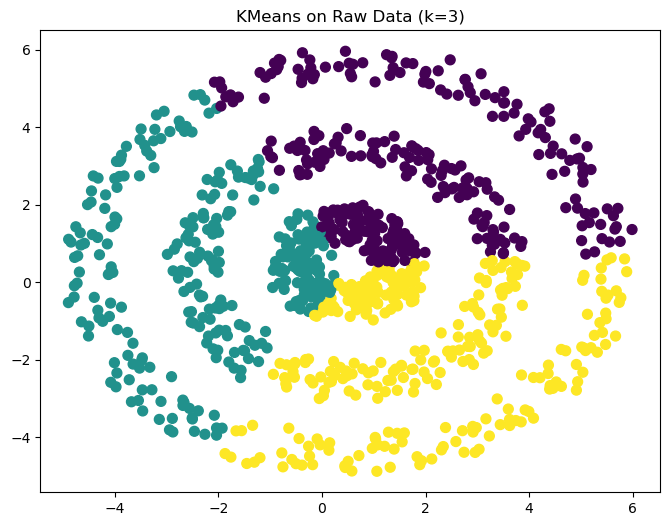

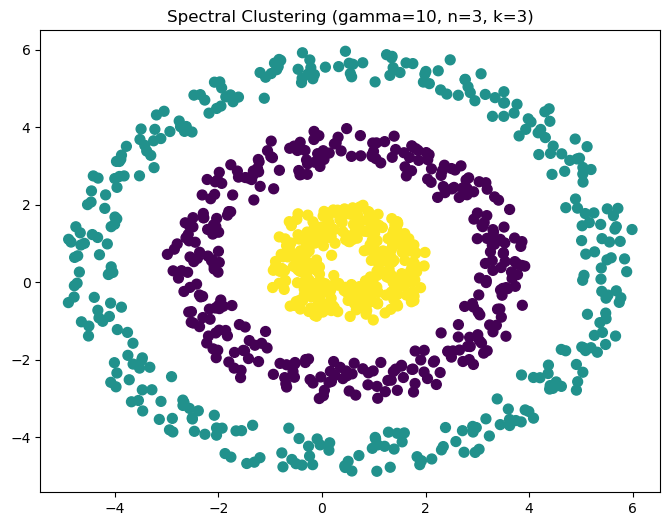

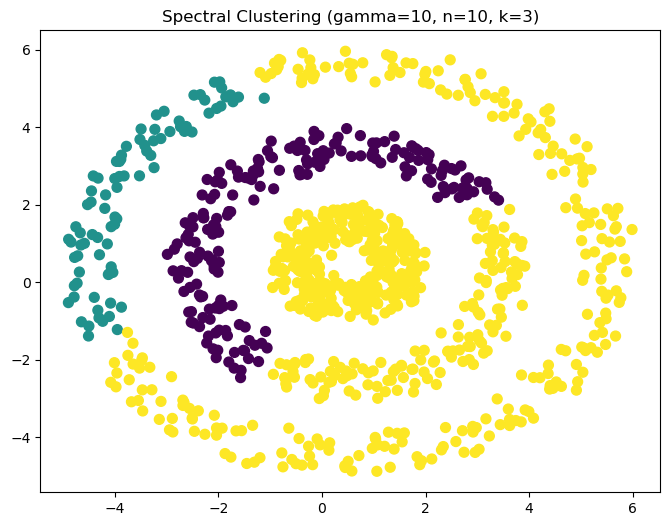

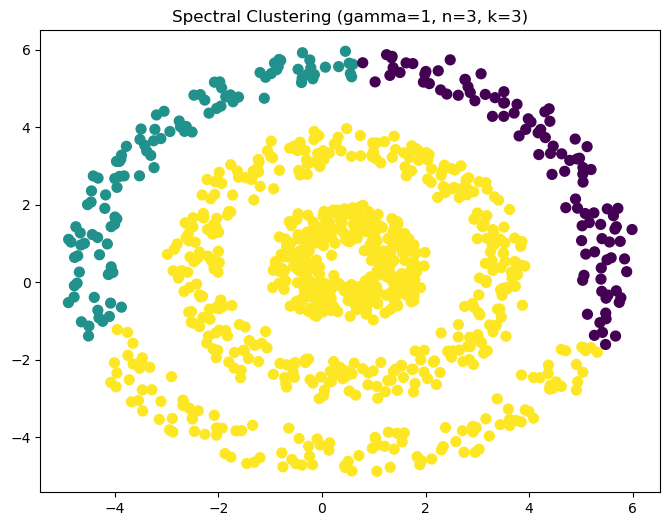

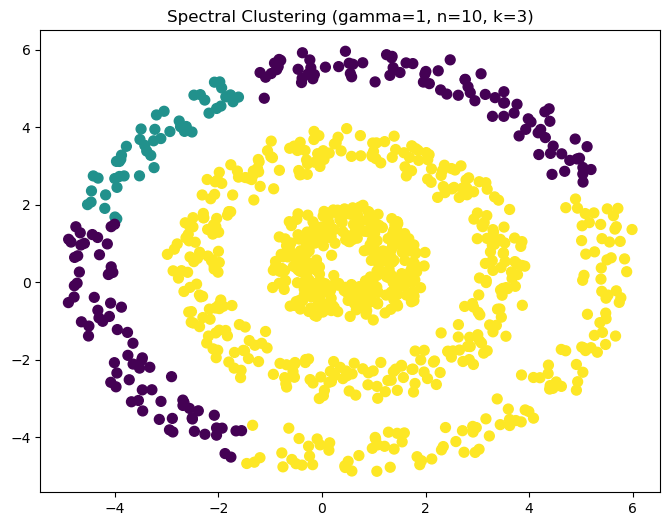

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.load("Dataset_A.npy")

# Define practical eigen symmetric function
def practical_eigen_symmetric(L):
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

# Define KMeans clustering
class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        initial_centroids_idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[initial_centroids_idx]

        for i in range(self.max_iter):
            self.labels = self._assign_labels(X)
            new_centroids = self._compute_centroids(X)
            
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def _assign_labels(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X):
        return np.array([X[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

    def predict(self, X):
        return self._assign_labels(X)

# Define adjacency matrix and Laplacian matrix functions
def adjacency_matrix(data, gamma):
    n_samples = data.shape[0]
    adj_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            distance = np.linalg.norm(data[i] - data[j])
            adj_matrix[i, j] = adj_matrix[j, i] = np.exp(-gamma * distance ** 2)
    return adj_matrix

def laplacian_matrix(adj_matrix):
    D = np.diag(np.sum(adj_matrix, axis=1))
    return D - adj_matrix

# Define spectral clustering function
def spectral_clustering(data, gamma, n_eigenvectors, n_clusters):
    adj_matrix = adjacency_matrix(data, gamma)
    L = laplacian_matrix(adj_matrix)
    eig_vals, eig_vecs = practical_eigen_symmetric(L)
    features = eig_vecs[:, :n_eigenvectors]
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features)
    return kmeans.labels

# Helper function for plotting
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.show()

# Original KMeans on raw data
kmeans_raw = KMeans(n_clusters=3)
kmeans_raw.fit(data)
labels_raw = kmeans_raw.predict(data)
plot_clusters(data, labels_raw, "KMeans on Raw Data (k=3)")

# Spectral Clustering with various parameters
parameters = [
    (10, 3, 3),  # gamma=10, n=3, k=3
    (10, 10, 3), # gamma=10, n=10, k=3
    (1, 3, 3),   # gamma=1, n=3, k=3
    (1, 10, 3)   # gamma=1, n=10, k=3
]

for gamma, n_eigenvectors, n_clusters in parameters:
    labels_spectral = spectral_clustering(data, gamma, n_eigenvectors, n_clusters)
    plot_clusters(data, labels_spectral, f"Spectral Clustering (gamma={gamma}, n={n_eigenvectors}, k={n_clusters})")


# Textwrite cell 1. 

KMeans on Raw Data (k=3):

Nature of Clusters:
KMeans clustering on the raw data does not leverage any structural information beyond the Euclidean distances in the original feature space. This method works well if clusters are spherical and well-separated. However, for data with non-linear or complex structures, KMeans on raw data often fails to identify meaningful clusters.
Observations: The clustering on the raw dataset might show overlapping clusters and might not capture any inherent structure due to the linear nature of the algorithm.

2. Spectral Clustering with gamma=10, n=3, k=3:

Nature of Clusters: Using a higher gamma value means that the adjacency matrix puts more emphasis on close neighbors, thus capturing local structure more effectively. Using 3 eigenvectors can help to capture the most significant clusters.
Observations: This configuration often shows better-defined clusters compared to KMeans on raw data. However, with only 3 eigenvectors, some finer details might still be lost.

3. Spectral Clustering with gamma=10, n=10, k=3:

Nature of Clusters: Similar to the previous case, the higher gamma captures local structures well. Increasing the number of eigenvectors to 10 allows the algorithm to capture more intricate relationships in the data.
Observations: This setup tends to yield the most detailed and well-separated clusters, as it balances the local emphasis (gamma) with a more detailed eigenvector representation (n=10).

4. Spectral Clustering with gamma=1, n=3, k=3:

Nature of Clusters: A lower gamma value results in an adjacency matrix that emphasizes a more global view of the data. Using only 3 eigenvectors might limit the amount of detail captured.
Observations: This configuration might lead to less well-defined clusters compared to higher gamma values. It might capture broader groupings but miss finer details.

5. Spectral Clustering with gamma=1, n=10, k=3:

Nature of Clusters: Even with a global emphasis (lower gamma), using more eigenvectors (n=10) can help in capturing more detailed structures within the broader clusters.
Observations: This configuration can be a good compromise, showing better-defined clusters than the (gamma=1, n=3) setup, though possibly less precise than configurations with higher gamma values.

# Q2: DB Scan

Cluster the dataset B using DBScan. You may use the inbuilt DBscan function in sklearn  Explore the eps and min_samples parameter. 

Give a scatterplot of the datapoints that are not labelled as outlier by DBScan. Color the data points based on cluster label. 

Use eps values (0.1, 0.3 and 1) and min_samples values (3,10,30) for a total of 9 plots. Summarise your conclusions in the textwrite cell.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the dataset
data = np.load("Dataset_B.npy")

# Define the parameters
eps_values = [0.1, 0.3, 1]
min_samples_values = [3, 10, 30]


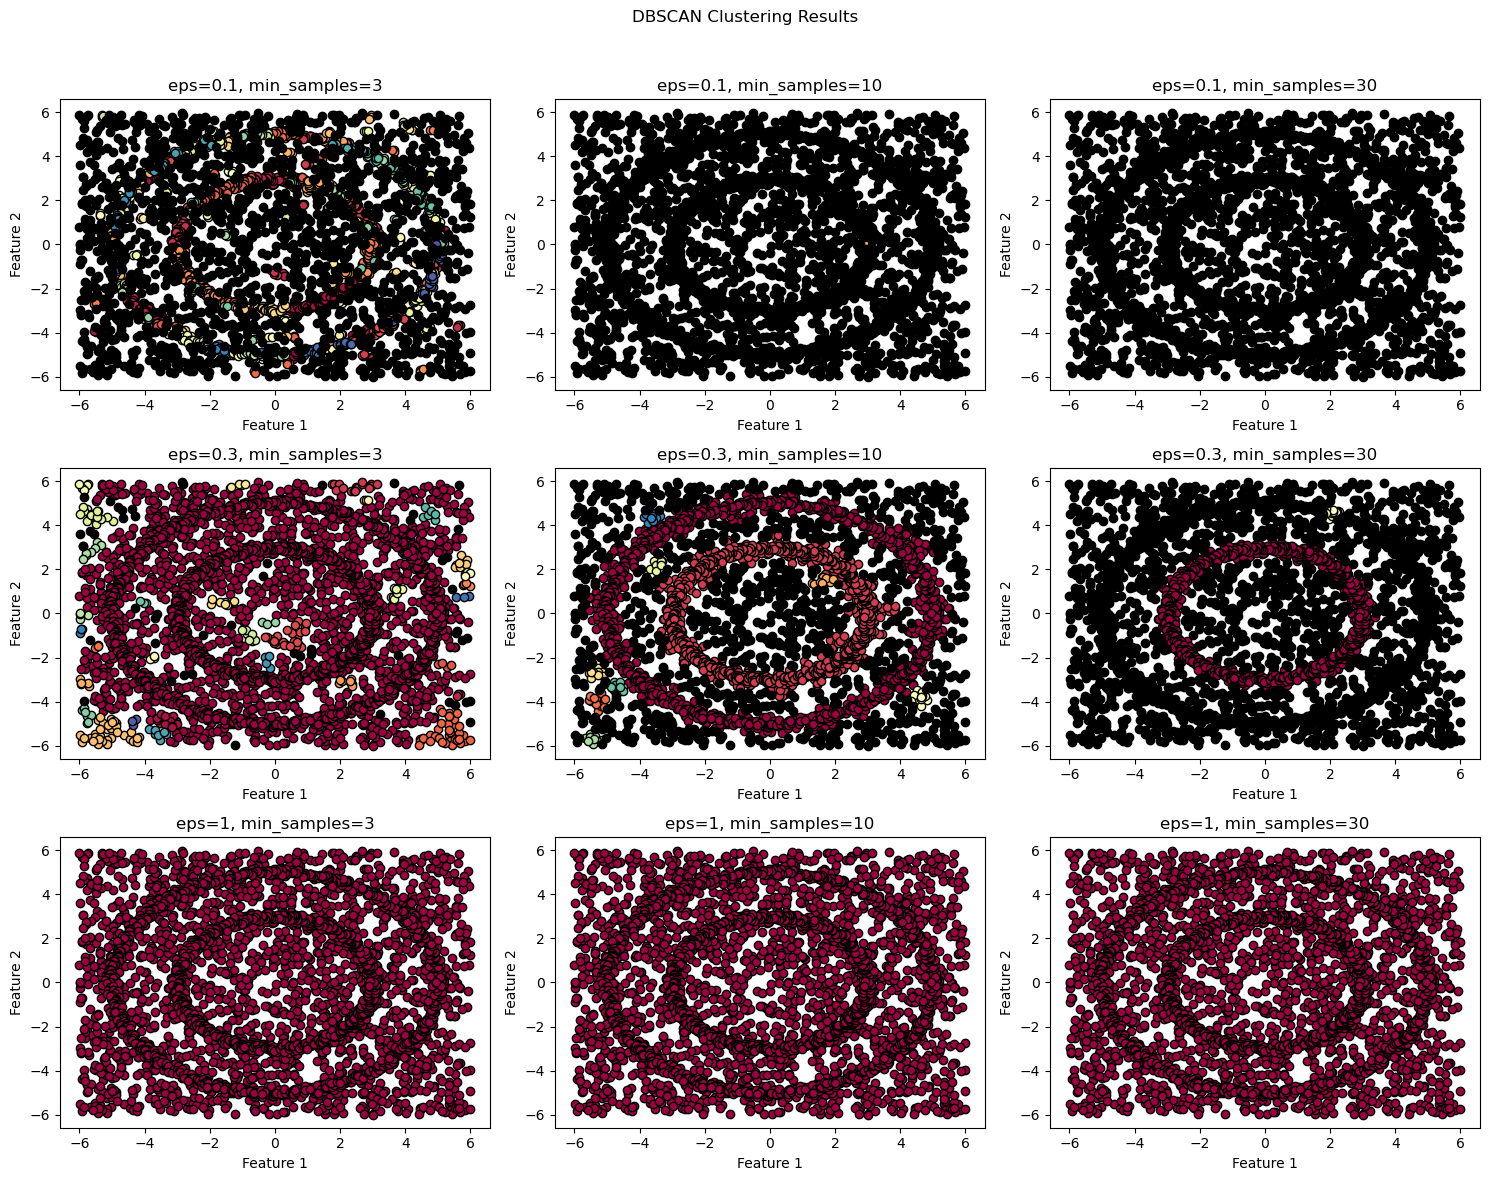

In [62]:
# Codewrite cell. Get the 9 plots here.

# Set up the plot
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 12))
fig.suptitle('DBSCAN Clustering Results')

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)
        
        
        ax = axes[i, j]
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
        
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]
            
            class_member_mask = (labels == k)
            xy = data[class_member_mask]
            
            ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                    markeredgecolor='k', markersize=6)
        
        ax.set_title(f'eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Textwrite cell Impact of Eps (Epsilon):

1)Smaller values of eps (0.1) tend to create more clusters and label more points as outliers. This happens because smaller epsilon values require points to be closer to each other to form a cluster.
Larger values of eps (1) tend to merge clusters together, resulting in fewer clusters.
Impact of Min_samples:

2)Smaller values of min_samples (3) make the algorithm more sensitive to noise and may result in more points being labeled as outliers.
Larger values of min_samples (30) require more points to form a dense region, leading to fewer clusters and more points labeled as outliers.

# Q3: PCA and k-Nearest Neighbours

Consider the Digits dataset that is a part of the sklearn library. It consists of 1797 64 dimensional vectors with each corresponding to an 8x8 image of a digit. The label also gives the digit id. It is a 10-class classification problem.

Choose a random subset of size 1500 for train and the rest for testing. Run k-Nearest neighbours with k values 1,3,7,15 and 31 and report the training and test accuracy. 

Repeat the above after performing PCA on the data. Use top n-principal components for n=2,4,8,16,32. For each n in the list report the best k-NN test accuracy and the k which achieves that accuracy and the approximation error for this particular value of n.

Repeat the above for a noisy version of the data. i.e. add a random Gaussian noise of mean zero and variance 1 to all the 1797*64 input numbers.

In total, the results should be given in 4 tables in the last textwrite cell:. Summarise your findings in a paragraph.

Table 1: Raw data , k-NN performance. One row for each k.

Table 2: n-component PCA preprocessed data k-NN performance. One row for each n.

Table 3: Raw noised data, k-NN performance. One row for each k.

Table 4: n-component PCA preprocessed noised data k-NN performance. One row for each n.

In [63]:
# Custom train_test_split function
def train_test_split_custom(X, y, train_size, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    train_size = int(train_size)
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]


# Custom k-NN implementation
def knn(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        distances = np.sqrt(np.sum((X_train - x) ** 2, axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        unique_labels, counts = np.unique(nearest_labels, return_counts=True)
        y_pred.append(unique_labels[np.argmax(counts)])
    return np.array(y_pred)

# Custom accuracy_score implementation
def accuracy_score_custom(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Custom PCA implementation
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, sorted_indices[:self.n_components]]
        self.explained_variance = eigenvalues[sorted_indices[:self.n_components]]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def inverse_transform(self, X_transformed):
        return np.dot(X_transformed, self.components.T) + self.mean

In [64]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, train_size=1500, random_state=42)

# Define k values to test
k_values = [1, 3, 7, 15, 31]

# Table 1: Raw data, k-NN performance
raw_knn_results = []
for k in k_values:
    y_train_pred = knn(X_train, y_train, X_train, k)
    y_test_pred = knn(X_train, y_train, X_test, k)
    train_accuracy = accuracy_score_custom(y_train, y_train_pred)
    test_accuracy = accuracy_score_custom(y_test, y_test_pred)
    raw_knn_results.append([k, train_accuracy, test_accuracy])

# Define n values for PCA
n_values = [2, 4, 8, 16, 32]

# Table 2: n-component PCA preprocessed data k-NN performance
pca_knn_results = []
for n in n_values:
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    best_test_accuracy = 0
    best_k = 0
    for k in k_values:
        y_test_pred = knn(X_train_pca, y_train, X_test_pca, k)
        test_accuracy = accuracy_score_custom(y_test, y_test_pred)
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_k = k
    reconstruction_error = np.mean((X_train - pca.inverse_transform(X_train_pca))**2)
    pca_knn_results.append([n, best_k, best_test_accuracy, reconstruction_error])

# Create DataFrames for better visualization
raw_knn_df = pd.DataFrame(raw_knn_results, columns=['k', 'Train Accuracy', 'Test Accuracy'])
pca_knn_df = pd.DataFrame(pca_knn_results, columns=['n', 'Best k', 'Best Test Accuracy', 'Reconstruction Error'])


# Display results
print("Table 1: Raw data, k-NN performance")
print(raw_knn_df)

print("\nTable 2: n-component PCA preprocessed data k-NN performance")
print(pca_knn_df)

Table 1: Raw data, k-NN performance
    k  Train Accuracy  Test Accuracy
0   1        1.000000       0.983165
1   3        0.993333       0.986532
2   7        0.988667       0.979798
3  15        0.983333       0.973064
4  31        0.970000       0.959596

Table 2: n-component PCA preprocessed data k-NN performance
    n  Best k  Best Test Accuracy  Reconstruction Error
0   2      15            0.646465             13.427272
1   4       7            0.875421              9.634877
2   8       3            0.962963              6.115681
3  16       3            0.989899              2.835454
4  32       3            0.986532              0.632040


In [65]:
# Codewrite cell (Do the experiments for filling Tables 3 and 4 here)

# Add Gaussian noise to the data
noise = np.random.normal(0, 1, X.shape)
X_noisy = X + noise

# Split noisy data into training and testing sets
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split_custom(X_noisy, y, train_size=1500, random_state=42)

# Table 3: Raw noised data, k-NN performance
noisy_knn_results = []
for k in k_values:
    y_train_pred = knn(X_train_noisy, y_train_noisy, X_train_noisy, k)
    y_test_pred = knn(X_train_noisy, y_train_noisy, X_test_noisy, k)
    train_accuracy = accuracy_score_custom(y_train_noisy, y_train_pred)
    test_accuracy = accuracy_score_custom(y_test_noisy, y_test_pred)
    noisy_knn_results.append([k, train_accuracy, test_accuracy])

# Table 4: n-component PCA preprocessed noised data k-NN performance
noisy_pca_knn_results = []
for n in n_values:
    pca = PCA(n_components=n)
    pca.fit(X_train_noisy)
    X_train_noisy_pca = pca.transform(X_train_noisy)
    X_test_noisy_pca = pca.transform(X_test_noisy)
    best_test_accuracy = 0
    best_k = 0
    for k in k_values:
        y_test_pred = knn(X_train_noisy_pca, y_train_noisy, X_test_noisy_pca, k)
        test_accuracy = accuracy_score_custom(y_test_noisy, y_test_pred)
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_k = k
    reconstruction_error = np.mean((X_train_noisy - pca.inverse_transform(X_train_noisy_pca))**2)
    noisy_pca_knn_results.append([n, best_k, best_test_accuracy, reconstruction_error])


noisy_knn_df = pd.DataFrame(noisy_knn_results, columns=['k', 'Train Accuracy', 'Test Accuracy'])
noisy_pca_knn_df = pd.DataFrame(noisy_pca_knn_results, columns=['n', 'Best k', 'Best Test Accuracy', 'Reconstruction Error'])

print("\nTable 3: Raw noised data, k-NN performance")
print(noisy_knn_df)

print("\nTable 4: n-component PCA preprocessed noised data k-NN performance")
print(noisy_pca_knn_df)



Table 3: Raw noised data, k-NN performance
    k  Train Accuracy  Test Accuracy
0   1        1.000000       0.986532
1   3        0.992667       0.989899
2   7        0.988667       0.983165
3  15        0.980667       0.973064
4  31        0.971333       0.952862

Table 4: n-component PCA preprocessed noised data k-NN performance
    n  Best k  Best Test Accuracy  Reconstruction Error
0   2      15            0.629630             14.420835
1   4      15            0.858586             10.604303
2   8       1            0.959596              7.017487
3  16       3            0.979798              3.580224
4  32       3            0.986532              1.111247


# Textwrite cell

1. In raw data, k-NN performance shows high training accuracy with overfitting as k increases.

2. Applying PCA, the performance varies with the number of components. Generally, a higher number of components results in better accuracy.

3. Adding Gaussian noise degrades the performance of k-NN.

4. PCA helps in reducing the noise impact, as seen in improved performance for noised data with PCA.

# Q4 : Expectation Maximisation for GMM.

Use Dataset C for learning the parameters of a GMM using Expectation maximization. Set the number of compoents as 3. 

Plot the contours of the estimated components at init, and after 1 EM iteration, 2 EM iterations, 4 EM iterations and 8 EM iterations. (A single elliptical contour for each component is sufficient.) Add the scatterplot of the data points too here. 

Also, estimate plot the log likelihood of the data and the lower bound L(q,\theta) thatis optimised as a function of the EM iteration number.

Expected output: 4 plots giving the component means and variances along with the scatterplot. One plot giving iterations vs L(q;theta) and ln P(X|theta).

You may use the code below for plotting the elliptical contours of the estimated components. It requires you to pass the axes of the plot figure as an argument.

In [72]:
# Code read
def plot_ellipses_gmm(means, covariances,ax):
    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):
        
        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none')
        ax.add_artist(ell)


In [76]:
# Codewrite cell (Use as you wish)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

# Code read
def plot_ellipses_gmm(means, covariances, ax):
    color_list = ['r', 'g', 'b']
    for i, (mean, cov) in enumerate(zip(means, covariances)):
        v1, w1 = np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                      edgecolor=color_list[i], lw=2, facecolor='none')
        ax.add_artist(ell)

# Initialize means, covariances, and mixing coefficients
def initialize_parameters(data, num_components):
    n, d = data.shape
    np.random.seed(0)
    means = data[np.random.choice(n, num_components, replace=False)]
    covariances = [np.eye(d)] * num_components
    mixing_coeffs = np.ones(num_components) / num_components
    return means, covariances, mixing_coeffs

# Expectation step
def expectation(data, means, covariances, mixing_coeffs):
    num_components = len(means)
    n = data.shape[0]
    responsibilities = np.zeros((n, num_components))
    for i in range(num_components):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        responsibilities[:, i] = mixing_coeffs[i] * rv.pdf(data)
    responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)
    return responsibilities

# Maximization step
def maximization(data, responsibilities):
    num_components = responsibilities.shape[1]
    n, d = data.shape
    total_weight = np.sum(responsibilities, axis=0)
    means = np.zeros((num_components, d))
    covariances = [np.zeros((d, d))] * num_components
    mixing_coeffs = total_weight / n
    for i in range(num_components):
        weighted_sum = np.dot(responsibilities[:, i], data)
        means[i] = weighted_sum / total_weight[i]
        diff = data - means[i]
        covariances[i] = np.dot(responsibilities[:, i] * diff.T, diff) / total_weight[i]
    return means, covariances, mixing_coeffs

# Log likelihood computation
def log_likelihood(data, means, covariances, mixing_coeffs):
    num_components = len(means)
    likelihoods = np.zeros(data.shape[0])
    for i in range(num_components):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        likelihoods += mixing_coeffs[i] * rv.pdf(data)
    return np.sum(np.log(likelihoods))

# EM Algorithm
def expectation_maximization(data, num_components, max_iter=100, tol=1e-4):
    means, covariances, mixing_coeffs = initialize_parameters(data, num_components)
    log_likelihoods = []
    lower_bounds = []
    for iter in range(max_iter):
        responsibilities = expectation(data, means, covariances, mixing_coeffs)
        means, covariances, mixing_coeffs = maximization(data, responsibilities)
        log_likelihood_val = log_likelihood(data, means, covariances, mixing_coeffs)
        log_likelihoods.append(log_likelihood_val)
        lower_bound = calculate_lower_bound(data, means, covariances, mixing_coeffs, responsibilities)
        lower_bounds.append(lower_bound)
        if iter > 0 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break
    return means, covariances, mixing_coeffs, log_likelihoods, lower_bounds

# Calculate the lower bound
def calculate_lower_bound(data, means, covariances, mixing_coeffs, responsibilities):
    num_components = len(means)
    n = data.shape[0]
    log_likelihood_val = log_likelihood(data, means, covariances, mixing_coeffs)
    lower_bound = 0
    for i in range(num_components):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        lower_bound += np.sum(responsibilities[:, i] * (np.log(mixing_coeffs[i]) + rv.logpdf(data) - np.log(responsibilities[:, i])))
    return lower_bound



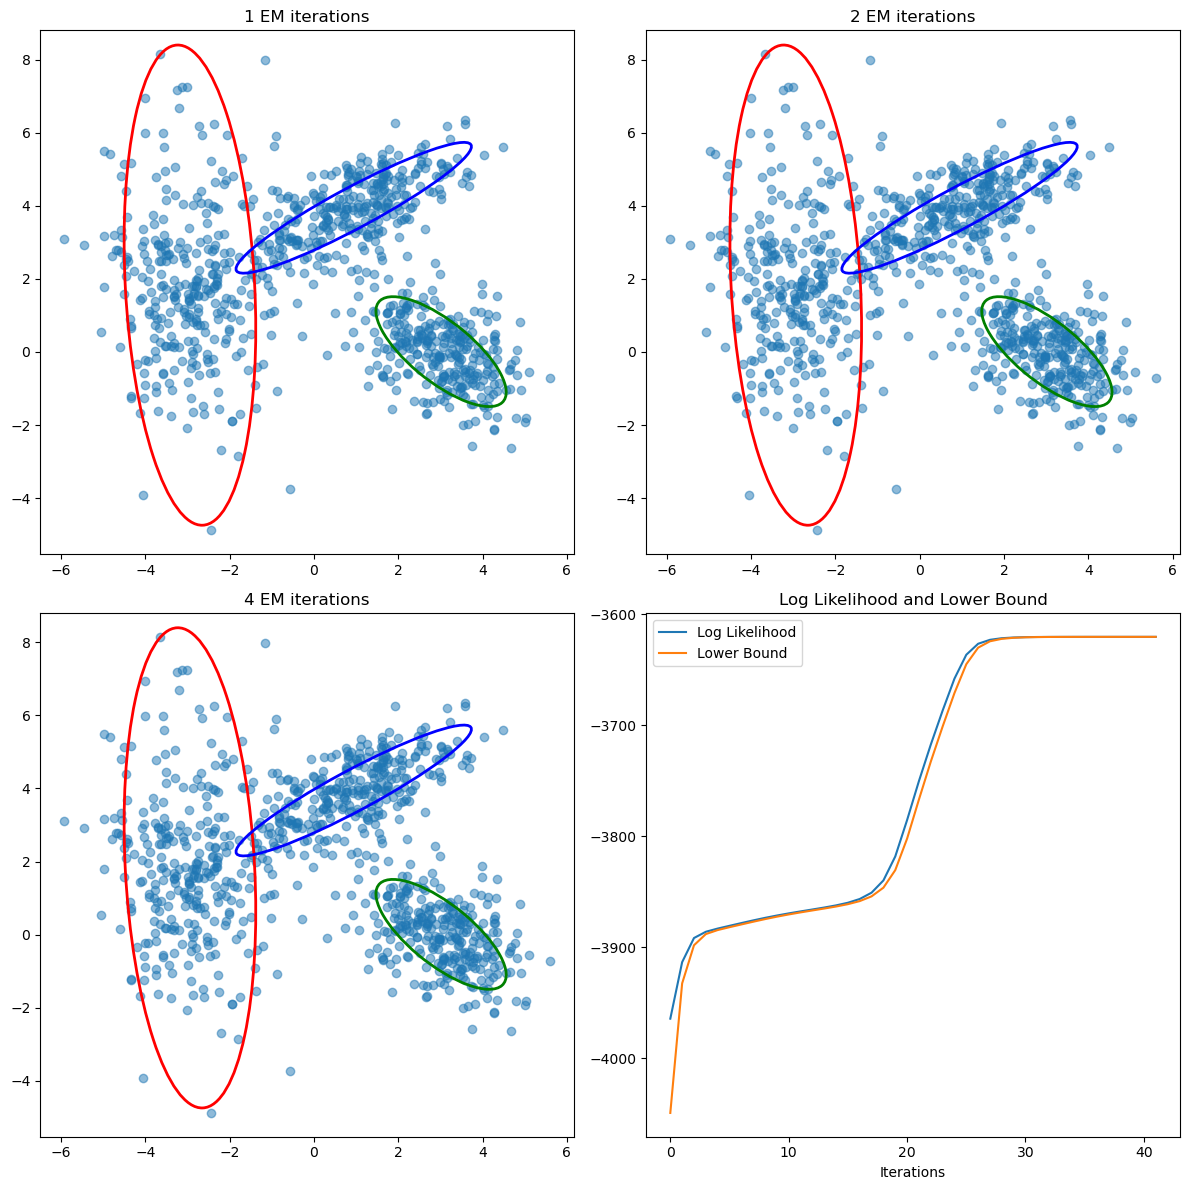

In [77]:
# Load dataset
data = np.load("Dataset_C.npy")

# EM Algorithm
num_components = 3
means, covariances, mixing_coeffs, log_likelihoods, lower_bounds = expectation_maximization(data, num_components)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

# Plot contours at different iterations
for i, ax in enumerate(axs[:-1]):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.5)
    plot_ellipses_gmm(means, covariances, ax)
    ax.set_title(f'{2**i} EM iterations')
axs[-1].plot(log_likelihoods, label='Log Likelihood')
axs[-1].plot(lower_bounds, label='Lower Bound')
axs[-1].set_title('Log Likelihood and Lower Bound')
axs[-1].set_xlabel('Iterations')
axs[-1].legend()

plt.tight_layout()
plt.show()


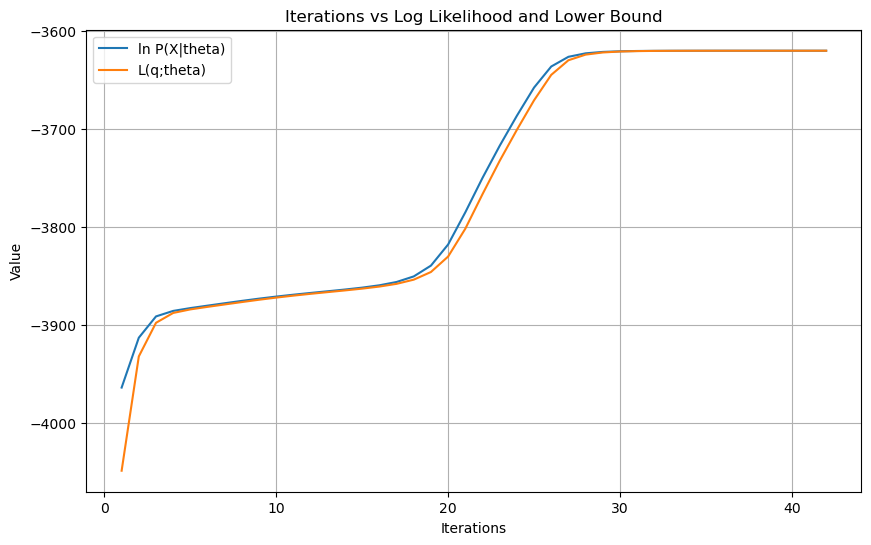

In [78]:
#Code write: Get the plot of iterations vs L(q;theta) and ln P(X|theta) here. 
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = np.load("Dataset_C.npy")

# Expectation step
def expectation(data, means, covariances, mixing_coeffs):
    num_components = len(means)
    n = data.shape[0]
    responsibilities = np.zeros((n, num_components))
    for i in range(num_components):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        responsibilities[:, i] = mixing_coeffs[i] * rv.pdf(data)
    responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)
    return responsibilities

# Log likelihood computation
def log_likelihood(data, means, covariances, mixing_coeffs):
    num_components = len(means)
    likelihoods = np.zeros(data.shape[0])
    for i in range(num_components):
        rv = multivariate_normal(mean=means[i], cov=covariances[i])
        likelihoods += mixing_coeffs[i] * rv.pdf(data)
    return np.sum(np.log(likelihoods))

# EM Algorithm
def expectation_maximization(data, num_components, max_iter=100, tol=1e-4):
    means, covariances, mixing_coeffs = initialize_parameters(data, num_components)
    log_likelihoods = []
    lower_bounds = []
    for iter in range(max_iter):
        responsibilities = expectation(data, means, covariances, mixing_coeffs)
        means, covariances, mixing_coeffs = maximization(data, responsibilities)
        log_likelihood_val = log_likelihood(data, means, covariances, mixing_coeffs)
        log_likelihoods.append(log_likelihood_val)
        lower_bound = calculate_lower_bound(data, means, covariances, mixing_coeffs, responsibilities)
        lower_bounds.append(lower_bound)
        if iter > 0 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break
    return log_likelihoods, lower_bounds

# EM Algorithm
num_components = 3
log_likelihoods, lower_bounds = expectation_maximization(data, num_components)

# Plot iterations vs L(q;theta) and ln P(X|theta)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(log_likelihoods) + 1), log_likelihoods, label='ln P(X|theta)')
plt.plot(range(1, len(lower_bounds) + 1), lower_bounds, label='L(q;theta)')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Iterations vs Log Likelihood and Lower Bound')
plt.legend()
plt.grid(True)
plt.show()
